<a href="https://colab.research.google.com/github/dsuwala/cmpp/blob/main/cmpp7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

In [ ]:
#spell to have animations working
from matplotlib import rc
rc('animation', html='jshtml', embed_limit='4096')

# Main functions

In [ ]:
def get_neighbors(state: np.ndarray) -> list:

    # 0 1 2
    # 3 4 5
    # 6 7 8
    # rolls over neighbors

    nb0 = np.roll(np.roll(state, 1, axis=0), 1, axis=1)
    nb1 = np.roll(state, 1, axis=0)
    nb2 = np.roll(np.roll(state, 1, axis=0), -1, axis=1)

    # same row
    nb3 = np.roll(state, 1, axis=1)
    nb4 = state
    nb5 = np.roll(state, -1, axis=1)

    # bottom row
    nb6 = np.roll(np.roll(state, -1, axis=0), 1, axis=1)
    nb7 = np.roll(state, -1, axis=0)
    nb8 = np.roll(np.roll(state, -1, axis=0), -1, axis=1)

    return [nb0, nb1, nb2, nb3, nb4, nb5, nb6, nb7, nb8]

In [ ]:
def calculate_score(state: np.ndarray, game_matrix: dict) -> np.ndarray:

    score = np.zeros(shape=state.shape)


    for i in range(state.shape[0]):
        for j in range(state.shape[1]):

            for nb in get_neighbors(state):

                if state[i, j] == 1 and nb[i, j] == 0:
                    score[i, j] += game_matrix["dc"]
                if state[i, j] == 1 and nb[i, j] == 1:
                    score[i, j] += game_matrix["dd"]
                if state[i, j] == 0 and nb[i, j] == 1:
                    score[i, j] += game_matrix["cd"]
                if state[i, j] == 0 and nb[i, j] == 0:
                    score[i, j] += game_matrix["cc"]
        
    return score


In [ ]:
# faster version of calculate score()
def calculate_score2(state: np.ndarray, game_matrix: np.ndarray) -> np.ndarray:

    score = np.zeros(shape=state.shape)

    for nb in get_neighbors(state):

        score += game_matrix[(2 * state + nb).astype(int)]
    
    return score

In [ ]:
def evolve_strategies(state, scores):
    
    next_states = np.zeros(shape=state.shape)
    score_nbrs = get_neighbors(scores)
    state_nbrs = get_neighbors(state)

    for i in range(state.shape[0]):
        for j in range(state.shape[1]):

            # print([nb for nb in enumerate(get_neighbors(scores))])
            best_neighbor = max([nb for nb in enumerate(score_nbrs)], key=lambda a : a[1][i,j])
            next_states[i, j] = state_nbrs[best_neighbor[0]][i,j]


            # print(f"({i},{j}) {best_neighbor}")
    return next_states

In [ ]:
def color_code(current_state, previous_state):

    nbr = np.zeros(shape=current_state.shape)

    nbr = 2**1 * current_state + 2**0 * previous_state

    return nbr

In [ ]:
# for debugging
N = 5
state = np.zeros(shape=(N, N))
score = np.zeros(shape=(N, N))

state[N//2, N//2] = 1

game_matrix = {
    "cc" : 1.0,
    "dc" : 2.08,
    "cd" : 0.0, 
    "dd" : 0.0
}


# print(state)
# print(calculate_score(state, game_matrix))
# print(evolve_strategies(state, calculate_score(state, game_matrix)))

states = [state]
scores = np.zeros(shape=state.shape)
scores += calculate_score(states[-1], game_matrix)

for n in range(5):
    # print(n)

    print(f"{n} state {states[-1]}")
    print(f"{n} score {scores}")
    next_state = evolve_strategies(states[-1], scores)
    # scores = calculate_score(next_state, game_matrix)
    scores = calculate_score2(next_state, np.array([1, 0, 1.9, 0]))
    states.append(next_state.copy())


## Task 1

In [ ]:
N = 201
state = np.zeros(shape=(N, N))
score = np.zeros(shape=(N, N))

state[N//2, N//2] = 1

In [ ]:
states = [state]
scores = np.zeros(shape=state.shape)
scores += calculate_score2(states[-1], np.array([1, 0, 1.9, 0]))
b = 1.9

for n in range(1000):
    if n % 100:
        print(n)
    next_state = evolve_strategies(states[-1], scores)
    scores = calculate_score2(next_state, np.array([1, 0, b, 0]))
    states.append(next_state.copy())

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

def animate(i):
    ax.clear()
    ax.imshow(color_code(states[i+1], states[i]))


anim = FuncAnimation(fig, animate, frames=999, interval=100)
plt.close()
anim

## Task 2

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
import os
os.chdir("../gdrive/MyDrive/MISMaP/Lato22-23/cmpp7")

In [ ]:
N = 201
b_experiments = [1.1, 1.3, 1.4, 1.45, 1.5, 1.6, 1.7, 1.75, 1.78, 1.8, 1.82, 1.85, 1.9, 1.94, 1.96, 1.98, 2., 2.3]
f = []

In [ ]:

for b in b_experiments:

    print(f"calculating for b = {b}...")
    state = np.zeros(shape=(N, N), dtype=int)
    score = np.zeros(shape=(N, N))
    
    # random indicies to change to defectors
    d_indices = [(np.random.randint(N), np.random.randint(N)) for x in range(N**2//2)]
    
    # create defectors
    for idx in d_indices:
        state[idx] = 1
    
    
    states = [state]
    scores = np.zeros(shape=state.shape)
    scores += calculate_score2(states[-1], np.array([1, 0, b, 0]))
    
    for n in range(200):
        next_state = evolve_strategies(states[-1], scores)
        scores = calculate_score2(next_state, np.array([1, 0, b, 0]))
        states.append(next_state.copy())
    
    f.append(np.count_nonzero(states[-1] == 1))

    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    
    def animate(i):
        ax.clear()
        ax.imshow(color_code(states[i+1], states[i]))
        ax.set_title(f"b = {b}, step = {i}")
    
    anim = FuncAnimation(fig, animate, frames=199, interval=100)
    plt.close()
    anim.save(f"task2_b{b}.gif", writer=PillowWriter(fps=30), dpi=150)

calculating for b = 1.1...
calculating for b = 1.3...
calculating for b = 1.4...
calculating for b = 1.45...
calculating for b = 1.5...
calculating for b = 1.6...
calculating for b = 1.7...
calculating for b = 1.75...
calculating for b = 1.78...
calculating for b = 1.8...
calculating for b = 1.82...
calculating for b = 1.85...
calculating for b = 1.9...
calculating for b = 1.94...
calculating for b = 1.96...
calculating for b = 1.98...
calculating for b = 2.0...
calculating for b = 2.3...


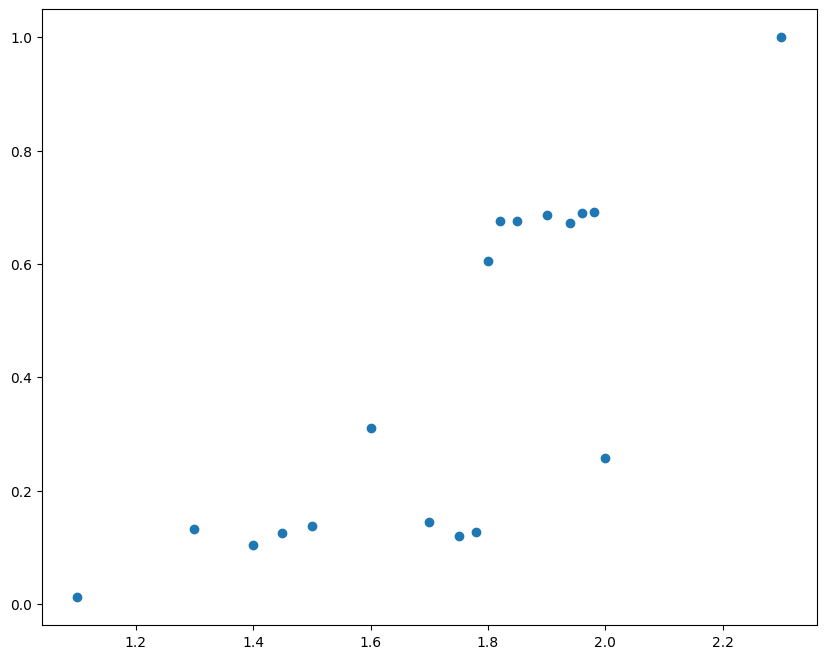

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

ax.scatter(b_experiments, np.array(f).astype(float) / N**2)